In [1]:
# Import Libraries

# Dataset Analysis lib
import pandas as pd
import numpy as np

#Dataset Visualization lib
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset First View

In [3]:
df = pd.read_csv('Customer Churn.csv')
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Discription about Dataset

**Telcom Customer Churn**

In this Dataset each row represents a customer, each column contains customer’s attributes described on the column Metadata. The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

# Column Discriptions

- `customerID` - The unique identifier for each customer.
- `gender` - Whether the customer is a male or a female.
- `SeniorCitizen` - Whether the customer is a senior citizen or not.
- `Partner` - Whether the customer has a partner or not.
- `tenure` - Number of months the customer has stayed with the company.
- `PhoneService` - Whether the customer has a phone service or not.
- `MultipleLines` - Whether the customer has multiple lines or not (Yes, No, No phone service).
- `InternetService` - Customer’s internet service provider (DSL, Fiber optic, No).
- `OnlineSecurity` - Whether the customer has online security or not (Yes, No, No internet service).
- `OnlineBackup` - Whether the customer has online backup or not (Yes, No, No internet service),
- `DeviceProtection` - Whether the customer has device protection or not (Yes, No, No internet service).
- `TechSupport` - Whether the customer has tech support or not (Yes, No, No internet service).
- `StreamingTV` - Whether the customer has streaming TV or not (Yes, No, No internet service).
- `StreamingMovies` - Whether the customer has streaming movies or not (Yes, No, No internet service).
- `Contract` - The contract term of the customer (Month-to-month, One year, Two year).
- `PaperlessBilling` - Whether the customer has paperless billing or not (Yes, No).
- `PaymentMethod` - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card).
- `MonthlyCharges` - The amount charged to the customer monthly.
- `TotalCharges` - The total amount charged to the customer.
- `Churn` - Whether the customer churned or not (Yes or No).

# Dataset Rows & Columns count

In [4]:
print("Number of rows = {}".format(df.shape[0]))
print("Number of columns = {}".format(df.shape[1]))

Number of rows = 7043
Number of columns = 21


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Column Types

- **Numerical** - Tenure, MonthlyCharges, TotalCharges
- **Categorical** - gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineBackup, OnlineSecurity, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, Contract, PaymentMethod, Churn.
- **Mixed** - customerID

# Data Correction

- In TotalCharges col, replacing blanks with 0 as tenure is 0 and no total charges are recorded.
- Changeing the column Data Type.
- converting 0 and 1 values of senior citizen to yes/no to make it easier to understand.

In [6]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df[["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService",
    "MultipleLines", "InternetService", "OnlineBackup", "OnlineSecurity",
    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
    "PaperlessBilling", "Contract", "PaymentMethod", "Churn"]] = df[["gender", "SeniorCitizen", "Partner",
                                                                     "Dependents", "PhoneService", "MultipleLines",
                                                                     "InternetService", "OnlineBackup", "OnlineSecurity",
                                                                     "DeviceProtection", "TechSupport", "StreamingTV",
                                                                     "StreamingMovies", "PaperlessBilling", "Contract",
                                                                     "PaymentMethod", "Churn"]].astype("category")

In [7]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

# Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [9]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


# Duplicate Values

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df["customerID"].duplicated().sum()

np.int64(0)

# Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# Churn Customer Distribution

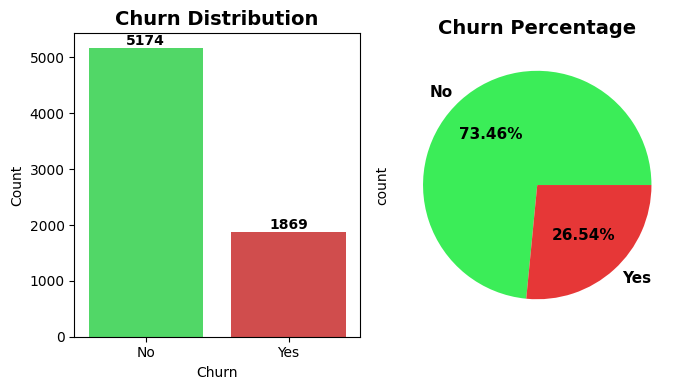

Churn Rate: 26.54%


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

colors = ['#3BED58', '#E63737']
# Count plot on "Churn"
sns.countplot(x='Churn', data=df, hue='Churn', legend=False, ax = axes[0], palette=colors)
for container in axes[0].containers:
    axes[0].bar_label(container, fontweight='bold')
axes[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')

# Pie Chart on "Churn"
df['Churn'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=colors, ax=axes[1], textprops = {'fontsize':11, 'weight':'bold'}, color=colors)
axes[1].set_title('Churn Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("Churn Rate: {:.2f}%".format((df['Churn'] == 'Yes').sum() / len(df) * 100))


From the given pie chart we can conclude that 26.54% of our customers have churned out.


# **Let's explore the reason.**

## Analysis on Numerical columns

In [14]:
# Numerical Column
skip_col = ['customerID']
numerical_col = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in skip_col]
numerical_col

['tenure', 'MonthlyCharges', 'TotalCharges']

### Tenure/MonthlyCharges/TotalChaarges Columns

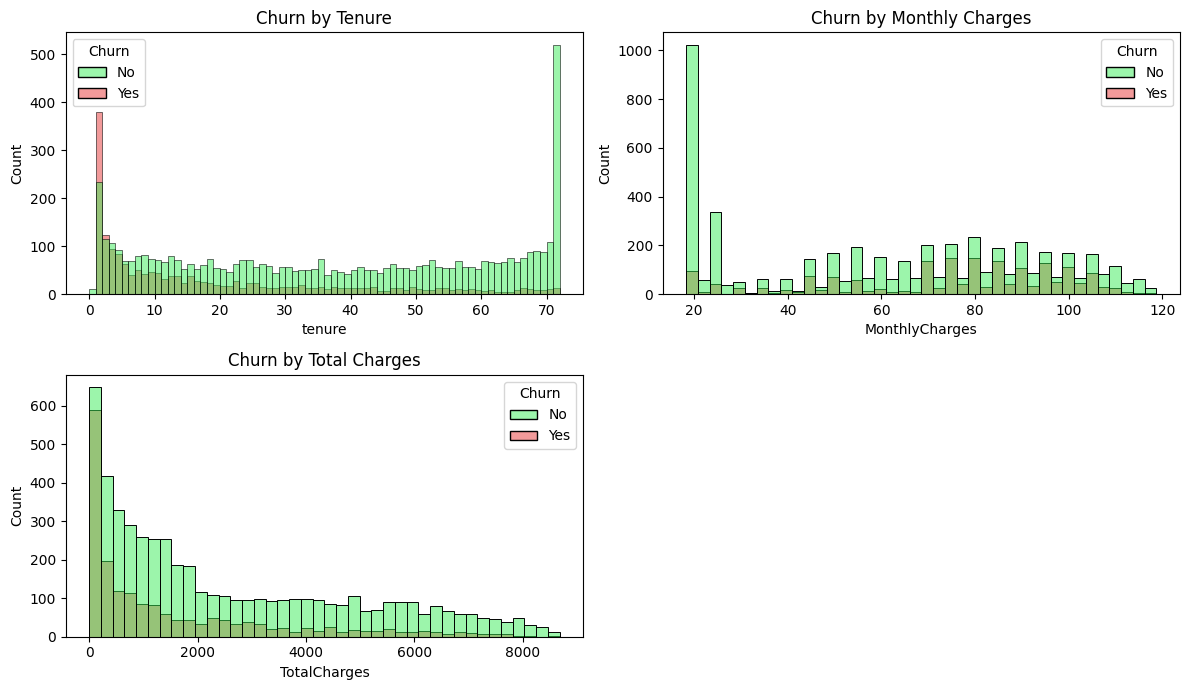

In [15]:


fig, axes = plt.subplots(2,2, figsize=(12,7))
colors = ['#3BED58', '#E63737']

# Hist plot on "tenure"
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn", ax=axes[0,0], palette=colors)
axes[0,0].set_title("Churn by Tenure")

# Hist plot on "MonthlyCharges"
sns.histplot(x = "MonthlyCharges", data = df, bins=40, hue="Churn", ax=axes[0,1], palette=colors)
axes[0,1].set_title("Churn by Monthly Charges")

#Hist plot on "TotalCharges"
sns.histplot(x = "TotalCharges", data = df, bins=40, hue="Churn", ax=axes[1,0], palette=colors)
axes[1,0].set_title("Churn by Total Charges")

fig.delaxes(axes[1,1])

plt.tight_layout()
plt.show()

- people who have used services for a long time have stayed and people who have used our sevices 1 or 2 months  have churned.

## Analysis on Categorical Columns

In [16]:
# Categorical Columns

skip_col = ['Churn']
categorical_col = [col for col in df.select_dtypes(include=['category']).columns if col not in skip_col]
categorical_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

### Gender

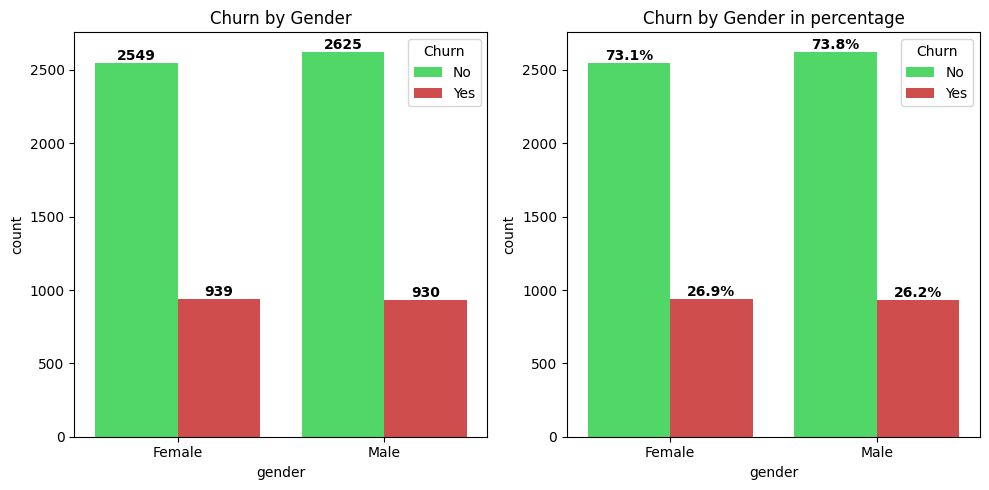

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
colors = ['#3BED58', '#E63737']

# Count plot on "gender"
sns.countplot(x = "gender", data = df, hue = "Churn", ax = axes[0], palette=colors)
for container in axes[0].containers:
    axes[0].bar_label(container, fontweight='bold')
for label in axes[0].texts:
    label.set_fontweight('bold')
axes[0].set_title("Churn by Gender")

# Count plot on "gender" in percentage.
sns.countplot(x="gender", data=df, hue="Churn", ax=axes[1], palette=colors)
total = df.groupby("gender", observed=True).size()
for i, container in enumerate(axes[1].containers):
    labels = []
    for bar in container:
        gender = bar.get_x() + bar.get_width() / 2
        label = bar.get_height()
        gender_name = axes[1].get_xticklabels()[int(round(gender))].get_text()
        percent = label / total[gender_name] * 100
        labels.append(f"{percent:.1f}%")
    axes[1].bar_label(container, labels=labels)
    for label in axes[1].texts:
        label.set_fontweight('bold')
axes[1].set_title("Churn by Gender in percentage")

fig.tight_layout()
fig.show()

- According to Gender column, the churn percentage of Male and Female are same.

### SeniorCitizen


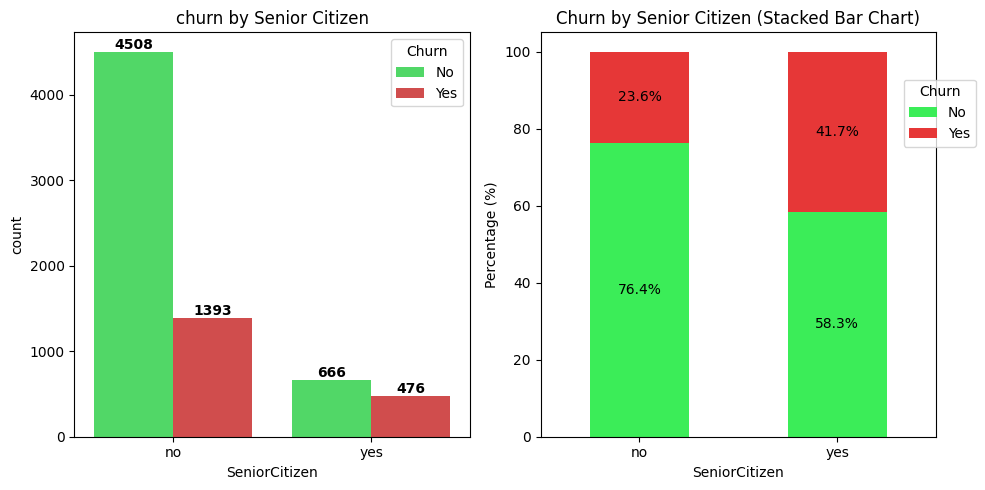

In [18]:
fig, axes = plt.subplots(1, 2, figsize = (10,5))
colors = ['#3BED58', '#E63737']

# Count plot on "SeniorCitizen"
sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn", ax = axes[0], palette=colors)
for container in axes[0].containers:
  axes[0].bar_label(container, fontweight='bold')
axes[0].set_title("churn by Senior Citizen")

# Stacked Bar Graph on "SeniorCitizen"
total_counts = df.groupby('SeniorCitizen', observed=True)['Churn'].value_counts(normalize=True).unstack() * 100
total_counts.plot(kind='bar', stacked=True, ax=axes[1], color=['#3BED58', '#E63737'])
# Add percentage labels on the bars
for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    axes[1].text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')
axes[1].set_title('Churn by Senior Citizen (Stacked Bar Chart)')
axes[1].set_xlabel('SeniorCitizen')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Churn', bbox_to_anchor = (0.9,0.9))

plt.tight_layout()
plt.show()

- Maximum percentage of senior citizen have churned compare to the non-senior citizen.

### Partner, Dependents, StreamingTV, StreamingMovies, PhoneService, MultipleLines

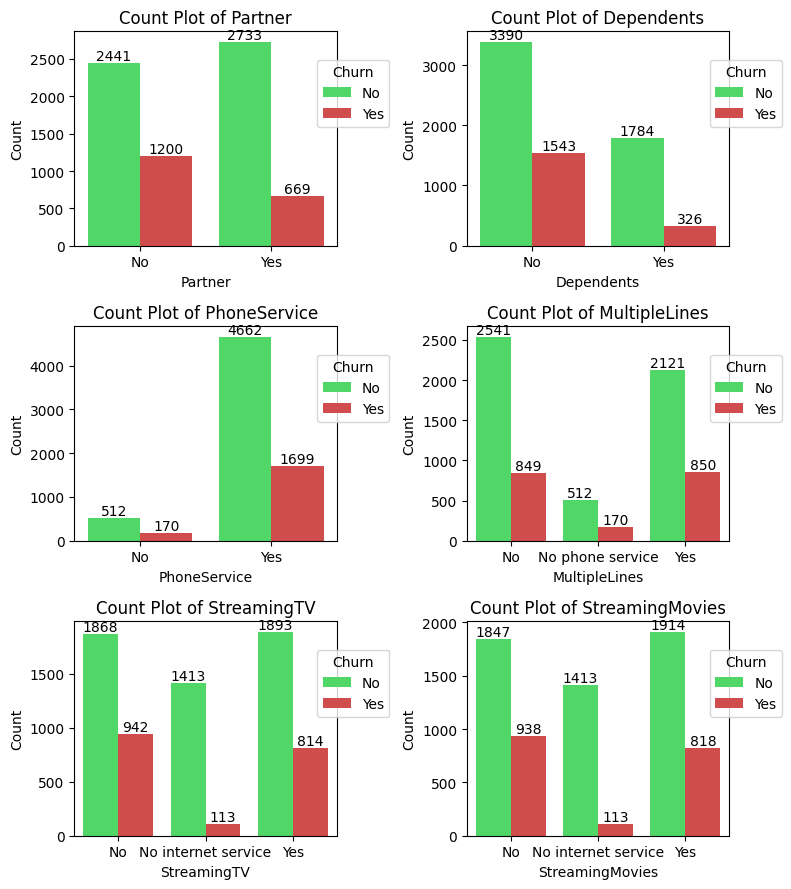

In [19]:
columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(3, 2, figsize=(8, 9))
colors = ['#3BED58', '#E63737']

axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"], palette=colors)
    axes[i].set_title(f'Count Plot of {col}')
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Churn', bbox_to_anchor = (0.9,0.9))

fig.tight_layout()
plt.show()

**Partner/Dependents**
- Customers without partners or dependents are more likely to churn.

**StreamingTV/StreamingMovies**
- Customers without streaming services are more likely to leave.

**PhoneService/MultipleLines**
- Basic phone service users are more stable than users with complex/multiple setups.

### InternetService

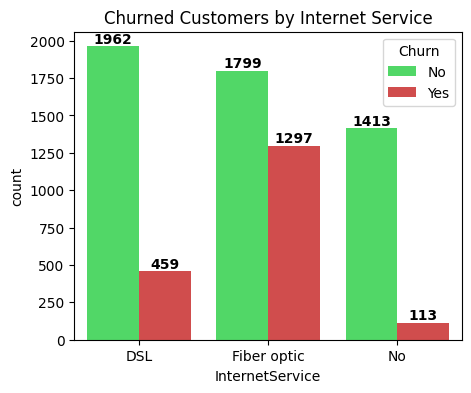

In [20]:
plt.figure(figsize = (5,4))
colors = ['#3BED58', '#E63737']
ax = sns.countplot(x = "InternetService", data = df, hue = "Churn", palette=colors)
for container in ax.containers:
    ax.bar_label(container, fontweight='bold')
plt.title("Churned Customers by Internet Service")
plt.show()

- Customers using fiber optic internet have the highest churn risk.

### **Add-On Services** - OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport

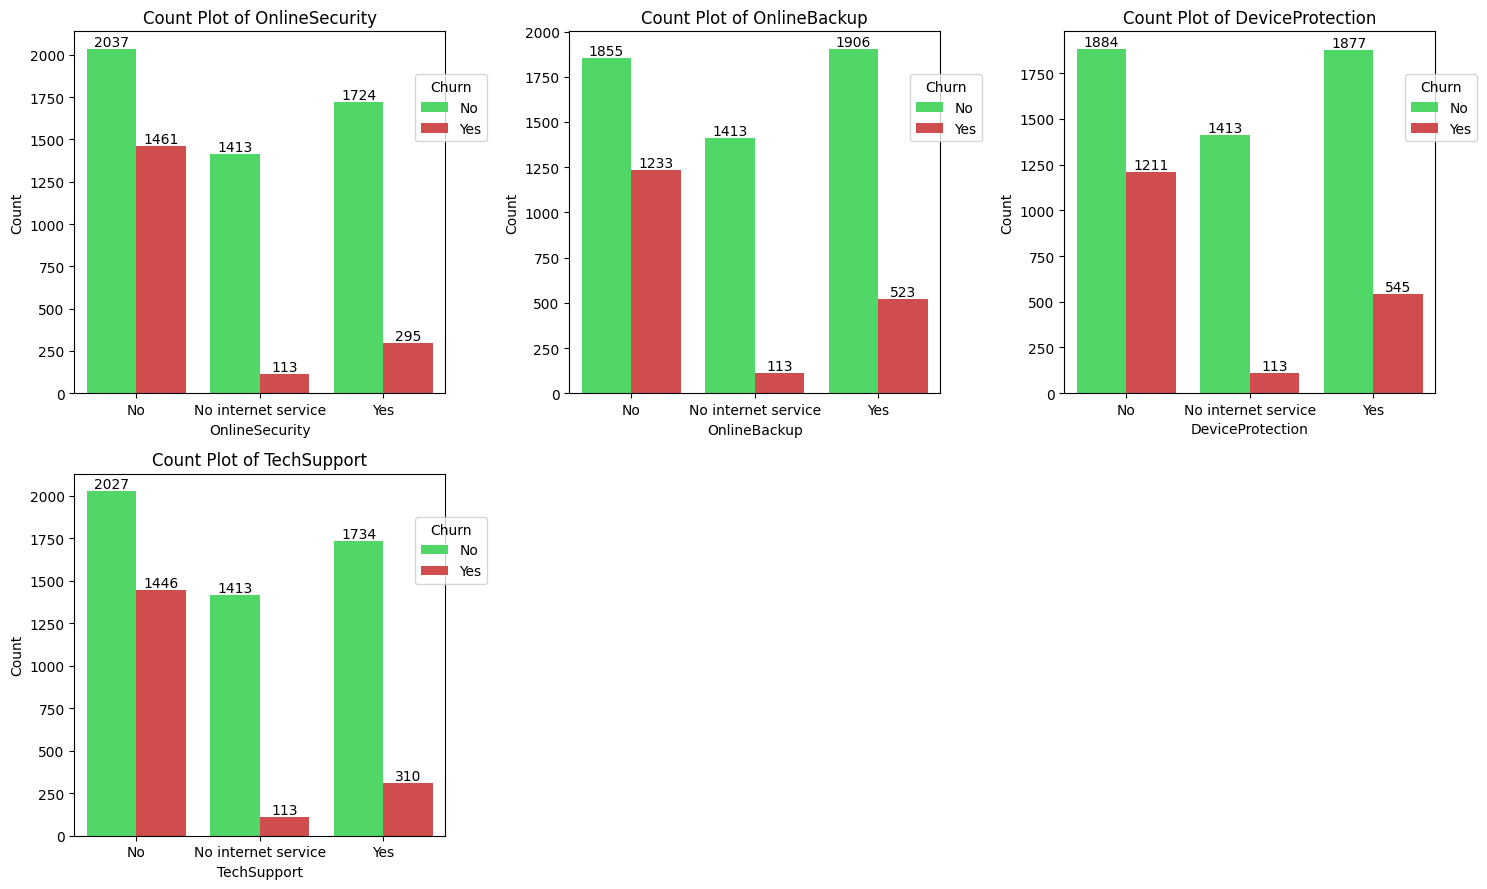

In [21]:
# Add-On Services

columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
colors = ['#3BED58', '#E63737']

axes = axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"], palette=colors)
    axes[i].set_title(f'Count Plot of {col}')
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Churn', bbox_to_anchor = (0.9,0.9))

# Remove empty subplots
fig.delaxes(axes[4])
fig.delaxes(axes[5])

fig.tight_layout()
plt.show()

- Customers who don’t take extra services like Online Security, Online Backup, Device Protection, or Tech Support are churning at a much higher rate.
- people who use at least one of these services tend to stay longer, which shows they’re more engaged and satisfied.
- This pattern suggests that encouraging customers to use these add-on services could help reduce churn and improve retention.

### Contract

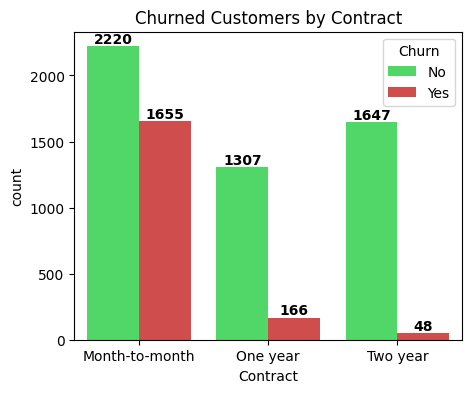

In [22]:


plt.figure(figsize = (5,4))
colors = ['#3BED58', '#E63737']

ax = sns.countplot(x = "Contract", data = df, hue = "Churn", palette=colors)
for container in ax.containers:
    ax.bar_label(container, fontweight='bold')
plt.title("Churned Customers by Contract")
plt.show()

- people who have month-to-month contract are likely to churn then from those who have 1 or 2 years or contract.

### PaymentMethod

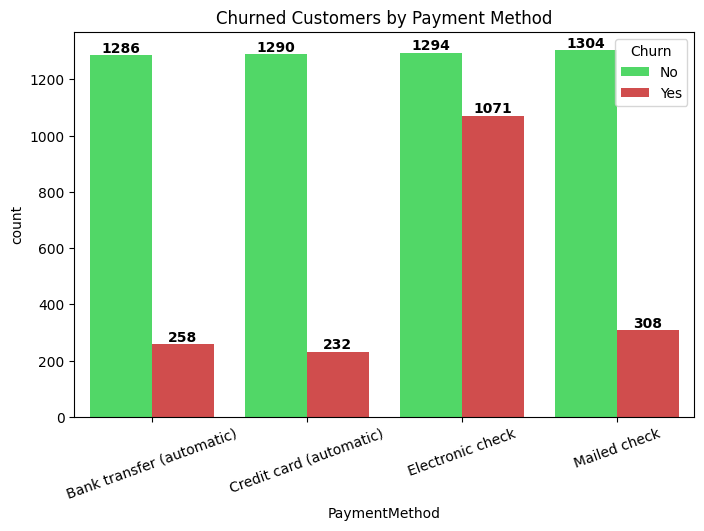

In [23]:
plt.figure(figsize = (8,5))
colors = ['#3BED58', '#E63737']
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn", palette=colors)
for container in ax.containers:
    ax.bar_label(container, fontweight='bold')
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 20)
plt.show()

- customer is likely to churn when he is using electronic check as a payment method.